# QuantLET example: Moving Average Cross Over

http://quantlet.net

This example shows the arrangement of Quantlet's building blocks, 'QLets', into directional graphs called 'streams'. Other features related to concurrency, reactive event processing and the simulation meta-model will be shown on future examples.

This is the 'hello world' of algorithmic strategies. A simplification of MAC-O described in Algorithmic Trading Strategies by M. Schoeffel.

Generation of buy and sell signals whenever the spot price of a simulated asset crosses up (buy signal) or down (sell signal) a historical moving average. Please bare in mind this is a very simple and unrealistic example of quantlet, an on-going research work. 

(c) 2014 Jorge M. Faleiro Jr


## Pre-requisites

Ubuntu:

sudo apt-get install python-numpy python-scipy python-matplotlib ipython ipython-notebook python-pandas python-sympy python-nose pandoc

sudo apt-get install 'freetype*'

Pip:

ipython[all]
numpy
pipe
scipy
matplotlib
quantlet
PySide

## First things first...

Environment setup.. inline plots, making plots a bit bigger, etc..

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Sanity check

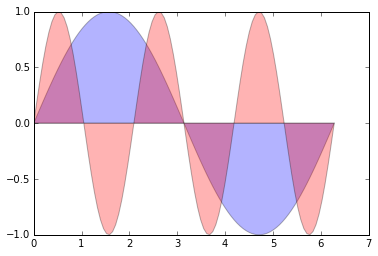

In [2]:
x = np.linspace(0, 2 * np.pi, 100)
y1 = np.sin(x)
y2 = np.sin(3 * x)
plt.fill(x, y1, 'b', x, y2, 'r', alpha=0.3)
plt.show()

Looks good. Ready to start. Quantlet imports... going verbose for the sake of transparency

In [3]:
from quantlet import describe, clear
from quantlet.ds.rw import random_walk
from quantlet.ds.plot import plot
from quantlet.function.ma import ma
from quantlet.strats.momentum import maco
from quantlet.strats.portfolio import fixed_sized_delayed

interactive mode
dataset registration...
dataset fifo
imported <module 'quantlet.ds.fifo' from 'quantlet/ds/fifo.pyc'>, scheme=fifo
dataset mpubsub
imported <module 'quantlet.ds.mpubsub' from 'quantlet/ds/mpubsub.pyc'>, scheme=mpubsub
dataset plot
cannot load plot
dataset pubsub
cannot load pubsub
dataset rw
imported <module 'quantlet.ds.rw' from 'quantlet/ds/rw.pyc'>, scheme=rw
dataset sendreceive
cannot load sendreceive
dataset std
imported <module 'quantlet.ds.std' from 'quantlet/ds/std.pyc'>, scheme=stdout


I like my quantlet plots a bit large, so let's adjust accordingly

In [4]:
pylab.rcParams['figure.figsize'] = (15.0, 12.0)

## Generating a 'random walk'

Plotting just a random walk. Two QLets: random_walk and plot.
A different series is produced every time a random_walk dataset is chained

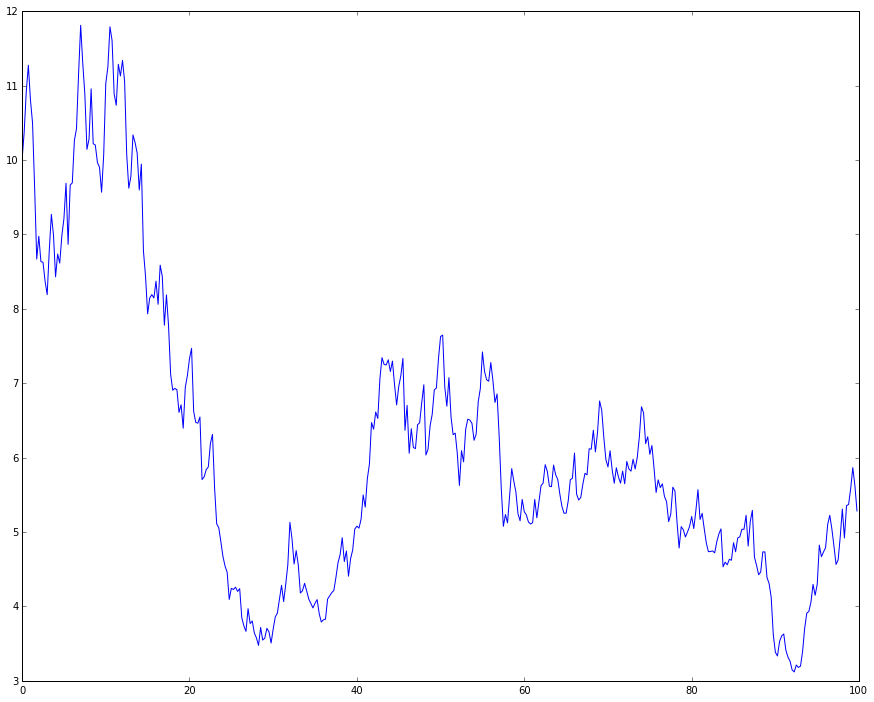

In [5]:
random_walk() >> plot

What does random_walk do?

In [6]:
random_walk?

In [7]:
clear()

## Generation of buys and sells signals

Now adding all pieces, each explained:

Datasets:

- random_walk(): a geometric brownian motion input dataset for ilustration 
- plot: plot output dataset

QLets:

- ma: generates a moving average of the randowm walk
- maco: a 'moving average cross over' strategy as a QLet, generates buys and sells signals based on crossover of price and historical moving average
- fixed_sized_delayed: portfolio and execution strategy, given an initial cash value, buys a fixed lot on a buy signal and sells the same lot on a sell signal

Literally one line, what gives...

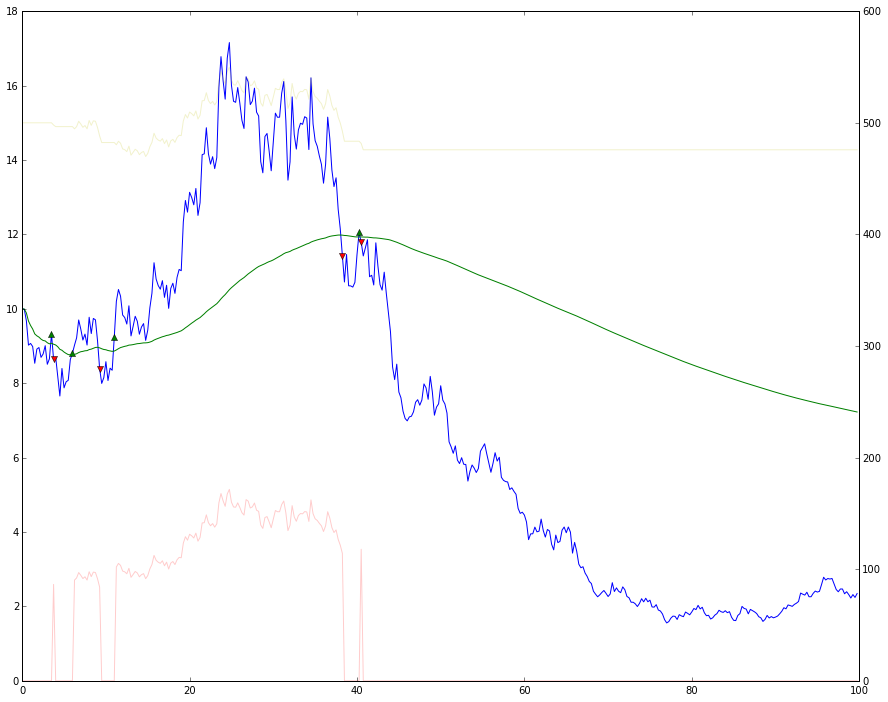

In [8]:
random_walk() \
>> ma \
>> maco \
>> fixed_sized_delayed \
>> plot

In which:

    - blue: random walk simulation of an asset price
    - green: smoothing as a moving average
    - red triangles: sell signals
    - green triangles: buy signals
    - yellow: porfolio value (porfolio value = cash value + stock value)
    - pinkish: portfolio value associated to asset holdings and price 

what is the current setup?

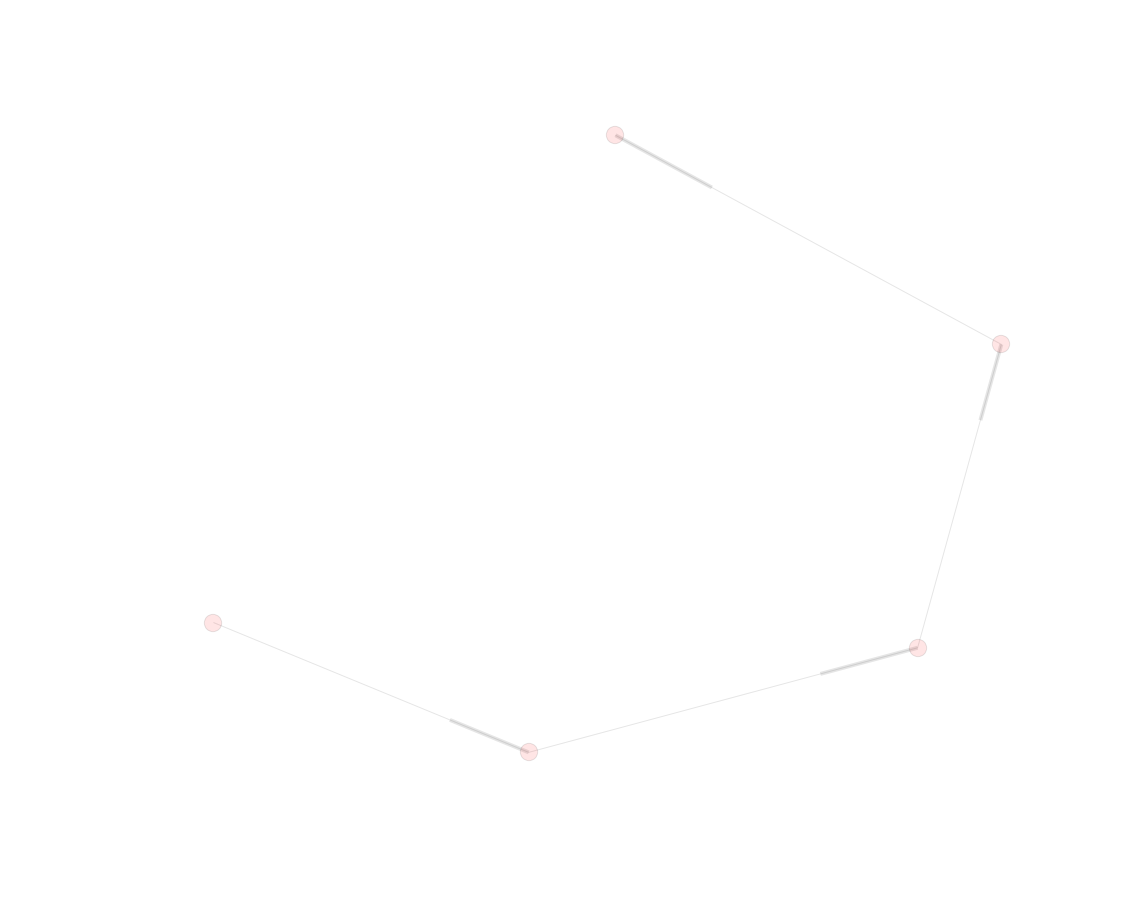

In [9]:
describe() 

In [10]:
clear()

Trying a different shock: any differences in reversing buy and sell signals?

CPU times: user 260 ms, sys: 40 ms, total: 300 ms
Wall time: 485 ms


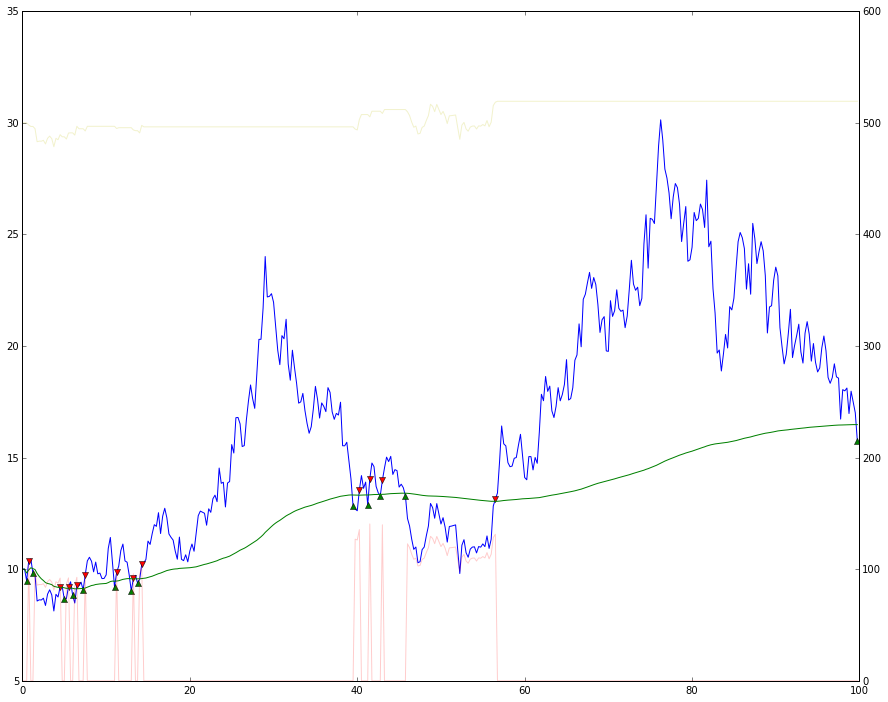

In [11]:
%time \
random_walk() \
>> ma \
>> maco(reverse=True) \
>> fixed_sized_delayed \
>> plot

Not much...